In [1]:
import quandl
quandl.ApiConfig.api_key = 'yACpi8J95VWoPd_8qYmv'

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
%run ../Helpers.ipynb

In [3]:
# data_date = date(2009, 8, 1)
# data_date = date(2000, 6, 1)
# data_date = date(2013, 6, 1)
# data_date = date(2004, 1, 1)
# data_date = date(2000, 1, 1)
# data_date = date(2008, 1, 1)
# data_date = date(2006, 6, 1)
data_date = date.today()

In [4]:
anfci = quandl.get(Data.ANFCI, start_date=years_ago(3), end_date=date_fmt(data_date))
leverage = quandl.get(Data.LEVERAGE, start_date=years_ago(3), end_date=date_fmt(data_date))
ted = quandl.get(Data.TED, collapse='weekly', start_date=years_ago(3), end_date=date_fmt(data_date))
yldcrv = quandl.get(Data.YLDCRV, start_date=years_ago(3), end_date=date_fmt(data_date))
lo = quandl.get(Data.ED1, start_date=years_ago(3), end_date=date_fmt(data_date))

l_a = last(anfci)
c_a = last(anfci.pct_change(periods=52))

l_l = last(leverage)
c_l = last(leverage.pct_change(periods=52))

l_t = last(ted)
c_t = last(ted.pct_change(periods=52))

l_y = last(yldcrv)

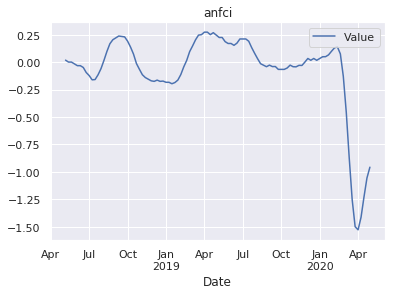

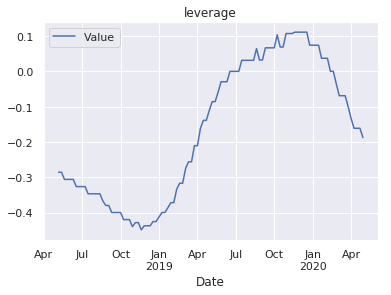

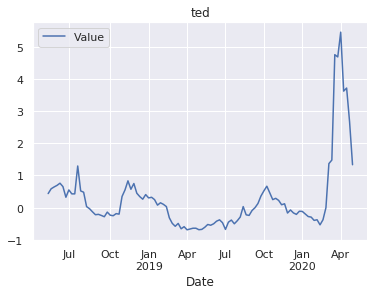

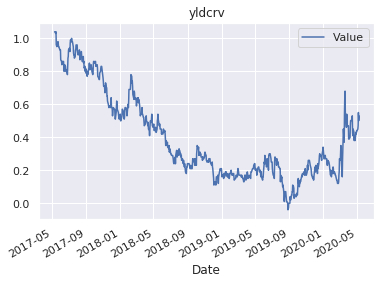

In [5]:
anfci.pct_change(periods=52).plot(title='anfci')
leverage.pct_change(periods=52).plot(title='leverage')
ted.pct_change(periods=52).plot(title='ted')
yldcrv.plot(title='yldcrv')

In [6]:
print('ANFCI', l_a)
print('ANFCI chg', c_a)

print('Leverage', l_l)
print('Leverage chg', c_l)

print('TED', l_t)
print('TED chg', c_t)

print('YldCrv', l_y)

ANFCI -0.03
ANFCI chg -0.9577464788732395
Leverage -0.26
Leverage chg -0.1875
TED 0.42
TED chg 1.3333333333333335
YldCrv 0.53


In [7]:
# strengthening, weakening
change = np.array([0, 0], dtype='f')
# strong, weak
position = np.array([0, 0], dtype='f')

if l_a > -0.2:
    position[1] += 1
else:
    position[0] += 1
if c_a > 0:
    change[1] += 1
else:
    change[0] += 1

if l_l > 0:
    position[1] += 1
else:
    position[0] += 1
if c_l > 0:
    change[1] += 1
else:
    change[0] += 1   

if l_t > 0.6:
    position[1] += 1
else:
    position[0] += 1
if c_t > 0:
    change[1] += 1
else:
    change[0] += 1

if l_y < 0:
    position[0] += 1
else:
    position[1] += 1

total_change = sum(change)
total_position = sum(position)
position /= total_position
change /= total_change
strong = position[0] > 0.5
strengthening = change[0] > 0.5
text = ''

if strong:
    text += 'Strong '
else:
    text += 'Weak '

if strong == strengthening:
    text += 'and '
else:
    text += 'but '

if strengthening:
    text += 'strengthening '
else:
    text += 'weakening '

text += 'liquidity'


print(position, total_position)
print(change, total_change)

print(text)

[0.5 0.5] 4.0
[0.6666667  0.33333334] 3.0
Weak but strengthening liquidity
